In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import legendre
import primitive
import ch_tester
import mks_localisation

In [3]:
def draw(x):
    plt.imshow(x)
    plt.colorbar()
    plt.show()

def make_dataset(seed, tsteps=1, shape=(1, 51, 51), dx = 0.1, dt=1e-2, gamma=1.):
    solver = ch_tester.ch_solver
    np.random.seed(seed)
    X0 = np.random.normal(loc=0.0, scale = 1.0, size=shape)*1.e-1
    X  = X0.copy() 
    for i in range(tsteps):
        X = solver(X, dx = 0.1, dt=1e-2, gamma= 1.)
    return X0, X

In [4]:
%%time
X_train, y_train = make_dataset(seed=99, tsteps=10, shape=(200,51,51), dx=0.1, dt=1e-2, gamma=1.)

CPU times: user 1.7 s, sys: 20 ms, total: 1.72 s
Wall time: 1.73 s


In [5]:
%%time
X_test, y_test = make_dataset(seed=81, tsteps=10, shape=(10,51,51), dx=0.1, dt=1e-2, gamma=1.)

CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 98 ms


In [6]:
%%time
n_states_ = 10
domain_   = (-1, 1)
# disc = legendre.legendre_basis
disc      = primitive.primitive_basis
coeff_    = mks_localisation.fit(X=X_train, y=y_train, domain=domain_, n_states=n_states_, discretize=disc)
y_predict = mks_localisation.predict(X=X_test, coeff=coeff_, domain=domain_, n_states=n_states_, discretize=disc)

CPU times: user 2.77 s, sys: 116 ms, total: 2.89 s
Wall time: 1.81 s


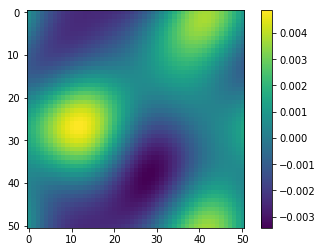

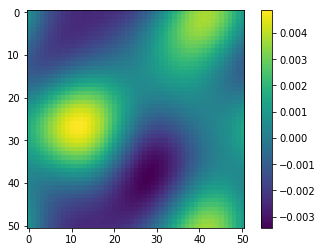

In [7]:
draw(y_test[0])
draw(y_predict[0])